# Objective: #
This study aims to show the general lines of the tax system adopted presently in the analized countries in order to see where the money of the public budget comes from, taxwise.

# Analized Countries: #
Brazil, Russia, India, China, S. Africa, EUA, Canada, Mexico, Argentina, Germany, Israel, France, Portugal, Spain, Poland, UK, Cingapore, Japan, Vietnam.

# Disclaimer:  #
Many of the countries analyzed have different tax systems and specificities what makes a perfectly equal comparison almost imposible (if not). That does not invalid comparison between them in a macro level.
        
# Sources: #
- www.tradingeconomics.com  
- www.taxfoundation.org  
- www.wikipedia.com  
- www.valorinveste.globo.com  
- www.contabilizei.com.br  
- www.oecd.org  
- www.worldbank.org  
- www2.deloitte.com/content/dam/Deloitte/cn/Documents/international-business-support/deloitte-cn-ibs-canada-int-tax-en-2018.pdf 
- https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Tax/dttl-tax-southafricaliahighlights-2020.pdf
- https://www.sars.gov.za/TaxTypes/DT/Pages/default.aspx
- https://home.kpmg/xx/en/home/insights/2011/12/vietnam-income-tax.html
- https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Tax/dttl-tax-vietnamhighlights-2020.pdf
- https://taxsummaries.pwc.com/vietnam/individual/taxes-on-personal-income
- https://taxsummaries.pwc.com/argentina/individual/income-determination
- https://www2.deloitte.com/content/dam/Deloitte/ar/Documents/tax/dttl-tax-argentinahighlights-2019.pdf
- https://taxsummaries.pwc.com/russian-federation/individual/taxes-on-personal-income
- https://www2.deloitte.com/content/dam/Deloitte/us/Documents/Tax/us-tax-ice-country-highlights-russia.pdf
- https://www.iras.gov.sg/IRASHome/Individuals/Locals/Working-Out-Your-Taxes/What-is-Taxable-What-is-Not/Dividends/
- https://www.guidemesingapore.com/business-guides/taxation-and-accounting/introduction-to-taxation/singapore-tax-system-and-tax-rates#:~:text=Singapore%20follows%20a%20single%2Dtier,22%25%20for%20non%2Dresidents.
- https://www.pwc.com/mu/en/services/india-desk/india-ddt-tax.html
- https://cleartax.in/s/how-dividends-taxable#:~:text=Answer%3A%20In%20India%2C%20a%20company,is%20liable%20for%20the%20tax.
- https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Tax/dttl-tax-chinahighlights-2020.pdf?nc=1
- https://taxsummaries.pwc.com/peoples-republic-of-china/individual/taxes-on-personal-income
- https://valorinveste.globo.com/blogs/andre-rocha/post/2020/07/governo-quer-baixar-impostos-das-empresas-mas-taxar-dividendos-qual-e-o-efeito-na-acao.ghtml
- http://legis.senado.leg.br/sdleg-getter/documento/download/6401fcab-b629-4f14-a140-2f39bc023e81

________________________

**Nota Pessoal:**
- Fazer um heatmap mostrando a regressividade dos sistemas de taxação.

In [1]:
import pandas as pd

In [2]:
#Creating dataframes and reading excel files.
corp_tax = pd.read_excel('List of Countries by Corporate Tax Rate.xls')
divdnd_tax = pd.read_excel('tax profits and dividends oecd 2020.xls', header=1)
pax_tax = pd.read_excel('List of Countries by Personal Income Tax Rate.xls')
sales_tax = pd.read_excel('List of Countries by Sales Tax Rate.xls')

In [3]:
#Creating list of analizes countries.
countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'United States', 'Canada', 'Mexico', 'Argentina', 'Germany', 'Israel', 'France', 'Portugal', 'Spain', 'Poland', 'United Kingdom', 'Singapore', 'Japan', 'Vietnam']

# 1st phase: Treat all df´s individually.

**Treating corp_tax:**

In [4]:
corp_tax

,Country,Last
0,Afghanistan Corporate Tax Rate,20.0
1,Albania Corporate Tax Rate,15.0
2,Algeria Corporate Tax Rate,26.0
3,Angola Corporate Tax Rate,30.0
4,Argentina Corporate Tax Rate,25.0
...,...,...
158,Venezuela Corporate Tax Rate,34.0
159,Vietnam Corporate Tax Rate,20.0
160,Yemen Corporate Tax Rate,20.0
161,Zambia Corporate Tax Rate,35.0


In [5]:
#Excluding the phrase 'Corporate Tax Rate' from the 'Country' column on corp_tax df to leave just the names of the countries.
corp_tax.Country = corp_tax.Country.apply(lambda x: x.replace(' Corporate Tax Rate', ''))

In [6]:
#Change the name of the 'Last' column.
corp_tax.rename(columns={'Last':'Corporate Income Tax'}, inplace=True)

In [7]:
#Creating final df with only the selected countries.
corp_tax_final = corp_tax[corp_tax['Country'].isin(countries)]

In [8]:
#Reseting index.
corp_tax_final.reset_index(drop=True, inplace=True)
corp_tax_final

,Country,Corporate Income Tax
0,Argentina,25.00
1,Brazil,34.00
2,Canada,26.50
3,China,25.00
4,France,28.00
5,Germany,30.00
6,India,25.17
7,Israel,23.00
8,Japan,30.62
9,Mexico,30.00


**Treating divdnd_tax:**  

Disclaimer: For this study we are considering specially the local individual shareholders.

In [9]:
divdnd_tax.head()

,Country,tax
0,Canada,26.44
1,Ireland,12.50
2,Australia,30.00
3,Korea,27.50
4,Denmark,22.00


In [10]:
#Renaming 'tax' column.
divdnd_tax.rename(columns={'tax':'Dividend Tax'}, inplace=True)
divdnd_tax

,Country,Dividend Tax
0,Canada,26.440000
1,Ireland,12.500000
2,Australia,30.000000
3,Korea,27.500000
4,Denmark,22.000000
5,Luxembourg,24.940000
6,Mexico,30.000000
7,Chile,25.000000
8,Turkey,22.000000
9,United Kingdom,19.000000


In [11]:
#Defining function to change the numbers to two decimals.
def two_decimals(number):
    return round(number, ndigits=2)

In [12]:
#Applying the function above.
divdnd_tax['Dividend Tax'] = divdnd_tax['Dividend Tax'].apply(lambda x: two_decimals(x))
divdnd_tax

,Country,Dividend Tax
0,Canada,26.44
1,Ireland,12.50
2,Australia,30.00
3,Korea,27.50
4,Denmark,22.00
5,Luxembourg,24.94
6,Mexico,30.00
7,Chile,25.00
8,Turkey,22.00
9,United Kingdom,19.00


In [13]:
#Selecting only the countries within 'countries' list.
divdnd_tax_final = divdnd_tax[divdnd_tax['Country'].isin(countries)].reset_index(drop=True)

In [14]:
divdnd_tax_final

,Country,Dividend Tax
0,Canada,26.44
1,Mexico,30.00
2,United Kingdom,19.00
3,France,32.02
4,Israel,23.00
5,United States,25.77
6,Portugal,31.50
7,Germany,29.90
8,Spain,25.00
9,Japan,29.74


In [15]:
#Checking which countries are not in the dataframe.
#Personal Note: Observe that I had to use the method 'set' so Python would allow me to subtract one group from the other.
missing_countries = list(set(countries) - set(divdnd_tax_final['Country']))
missing_countries

['Vietnam',
 'Singapore',
 'China',
 'India',
 'South Africa',
 'Argentina',
 'Brazil',
 'Russia']

In [16]:
#Creating dict with the sources mentioned on the beggining.
missing_countries = {'Country':['South Africa', 'Vitenam', 'Argentina', 'Russia', 'Singapore', 'India', 'China', 'Brazil'], 'Dividend Tax':[20,5,13,13,0,10,20,0]}

In [17]:
#Creating dataframe.
missing_countries = pd.DataFrame(missing_countries)

In [18]:
#Concatenating the two df´s.
divdnd_tax_final = pd.concat([divdnd_tax_final, missing_countries])

In [19]:
# Ordering df by country name and reseting index.
divdnd_tax_final.sort_values('Country', inplace=True)
divdnd_tax_final.reset_index(drop=True, inplace=True)
divdnd_tax_final

,Country,Dividend Tax
0,Argentina,13.00
1,Brazil,0.00
2,Canada,26.44
3,China,20.00
4,France,32.02
5,Germany,29.90
6,India,10.00
7,Israel,23.00
8,Japan,29.74
9,Mexico,30.00


**Treating pax_tax**

In [20]:
pax_tax

,Country,Last
0,Ivory Coast,60.00
1,Sweden,57.20
2,Finland,56.95
3,Japan,55.95
4,Denmark,55.80
...,...,...
152,Kuwait,0.00
153,Oman,0.00
154,Qatar,0.00
155,Saudi Arabia,0.00


In [21]:
#Selecting only the countries in 'countries'.
pax_tax_final = pax_tax[pax_tax['Country'].isin(countries)]

In [22]:
#Sorting df by country name.
pax_tax_final.sort_values('Country', inplace=True)

<ipython-input-22-16386f816ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pax_tax_final.sort_values('Country', inplace=True)


In [23]:
#Reseting index.
pax_tax_final.reset_index(drop=True, inplace=True)
pax_tax_final

,Country,Last
0,Argentina,35.00
1,Brazil,27.50
2,Canada,33.00
3,China,45.00
4,France,45.00
5,Germany,45.00
6,India,35.88
7,Israel,50.00
8,Japan,55.95
9,Mexico,35.00


In [24]:
pax_tax_final.rename(columns={'Last': 'Personal Income Tax'}, inplace=True)
pax_tax_final

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Personal Income Tax
0,Argentina,35.00
1,Brazil,27.50
2,Canada,33.00
3,China,45.00
4,France,45.00
5,Germany,45.00
6,India,35.88
7,Israel,50.00
8,Japan,55.95
9,Mexico,35.00


**Treating sales_tax**

In [25]:
sales_tax

,Country,VAT tax system,Complex Tax System,Unnamed: 3
0,Bhutan,50,NaN,NaN
1,Hungary,27,NaN,NaN
2,Croatia,25,NaN,NaN
3,Denmark,25,NaN,NaN
4,Norway,25,NaN,NaN
...,...,...,...,...
174,Andorra,4.5,NaN,NaN
175,Guam,2,NaN,NaN
176,Aruba,1.5,NaN,NaN
177,Oman,0,NaN,NaN


In [26]:
#Selecting countries.
sales_tax_final = sales_tax[sales_tax['Country'].isin(countries)]
sales_tax_final

,Country,VAT tax system,Complex Tax System,Unnamed: 3
10,Poland,23,NaN,NaN
11,Portugal,23,NaN,NaN
16,Argentina,21,NaN,NaN
23,Spain,21,NaN,NaN
32,France,20,NaN,NaN
38,Russia,20,NaN,NaN
42,United Kingdom,20,NaN,NaN
63,India,18,NaN,NaN
79,Brazil,State + local taxes (average),38.0,NaN
80,Israel,17,NaN,NaN


In [27]:
#Sorting alphabetically by countries names.
sales_tax_final.sort_values('Country', inplace=True)
sales_tax_final

<ipython-input-27-c71887d26f27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_tax_final.sort_values('Country', inplace=True)


,Country,VAT tax system,Complex Tax System,Unnamed: 3
16,Argentina,21,NaN,NaN
79,Brazil,State + local taxes (average),38.0,NaN
167,Canada,5,NaN,NaN
124,China,13,NaN,NaN
32,France,20,NaN,NaN
88,Germany,16,NaN,NaN
63,India,18,NaN,NaN
80,Israel,17,NaN,NaN
146,Japan,10,NaN,NaN
91,Mexico,16,NaN,NaN


In [28]:
#Reseting index.
sales_tax_final.reset_index(drop=True, inplace=True)
sales_tax_final

,Country,VAT tax system,Complex Tax System,Unnamed: 3
0,Argentina,21,NaN,NaN
1,Brazil,State + local taxes (average),38.0,NaN
2,Canada,5,NaN,NaN
3,China,13,NaN,NaN
4,France,20,NaN,NaN
5,Germany,16,NaN,NaN
6,India,18,NaN,NaN
7,Israel,17,NaN,NaN
8,Japan,10,NaN,NaN
9,Mexico,16,NaN,NaN


In [29]:
#Changing values of specific cells (Brazil and US).
sales_tax_final['VAT tax system'].iloc[1] = 38
sales_tax_final['VAT tax system'].iloc[17] = 7

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-29-28521af81c7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_tax_final['VAT tax system'].iloc[1] = 38
<ipython-input-29-28521af81c7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_tax_final['VAT tax system'].iloc[17] = 7


In [30]:
sales_tax_final

,Country,VAT tax system,Complex Tax System,Unnamed: 3
0,Argentina,21,NaN,NaN
1,Brazil,38,38.0,NaN
2,Canada,5,NaN,NaN
3,China,13,NaN,NaN
4,France,20,NaN,NaN
5,Germany,16,NaN,NaN
6,India,18,NaN,NaN
7,Israel,17,NaN,NaN
8,Japan,10,NaN,NaN
9,Mexico,16,NaN,NaN


In [31]:
#Dropping two useless columns.
sales_tax_final.drop(['Complex Tax System', 'Unnamed: 3'], axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
#Renaming 'VAT ...' column.
sales_tax_final.rename(columns={'VAT tax system': 'Sales Tax'}, inplace=True)
sales_tax_final

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Sales Tax
0,Argentina,21
1,Brazil,38
2,Canada,5
3,China,13
4,France,20
5,Germany,16
6,India,18
7,Israel,17
8,Japan,10
9,Mexico,16


In [33]:
sales_tax_final['Sales Tax'] = sales_tax_final['Sales Tax'].apply(lambda x: float(x))
sales_tax_final

<ipython-input-33-08ca70a59c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_tax_final['Sales Tax'] = sales_tax_final['Sales Tax'].apply(lambda x: float(x))


,Country,Sales Tax
0,Argentina,21.0
1,Brazil,38.0
2,Canada,5.0
3,China,13.0
4,France,20.0
5,Germany,16.0
6,India,18.0
7,Israel,17.0
8,Japan,10.0
9,Mexico,16.0


# 2nd phase: Merge all four df´s into one.

In [34]:
#Concat won´t work in this case because I have 4 columns with the same name on where I want to join the df´s.
tax_system = pd.concat([corp_tax_final, divdnd_tax_final, pax_tax_final, sales_tax_final], axis=1)
tax_system

,Country,Corporate Income Tax,Country,Dividend Tax,Country,Personal Income Tax,Country,Sales Tax
0,Argentina,25.00,Argentina,13.00,Argentina,35.00,Argentina,21.0
1,Brazil,34.00,Brazil,0.00,Brazil,27.50,Brazil,38.0
2,Canada,26.50,Canada,26.44,Canada,33.00,Canada,5.0
3,China,25.00,China,20.00,China,45.00,China,13.0
4,France,28.00,France,32.02,France,45.00,France,20.0
5,Germany,30.00,Germany,29.90,Germany,45.00,Germany,16.0
6,India,25.17,India,10.00,India,35.88,India,18.0
7,Israel,23.00,Israel,23.00,Israel,50.00,Israel,17.0
8,Japan,30.62,Japan,29.74,Japan,55.95,Japan,10.0
9,Mexico,30.00,Mexico,30.00,Mexico,35.00,Mexico,16.0


In [35]:
#So I use the function 'merge' and choose to merge the df´s on the 'Country' column.
final_tax_system = corp_tax_final.merge(divdnd_tax_final, on='Country', left_index=True, right_index=True).merge(pax_tax_final).merge(sales_tax_final)

In [36]:
final_tax_system

,Country,Corporate Income Tax,Dividend Tax,Personal Income Tax,Sales Tax
0,Argentina,25.00,13.00,35.00,21.0
1,Brazil,34.00,0.00,27.50,38.0
2,Canada,26.50,26.44,33.00,5.0
3,China,25.00,20.00,45.00,13.0
4,France,28.00,32.02,45.00,20.0
5,Germany,30.00,29.90,45.00,16.0
6,India,25.17,10.00,35.88,18.0
7,Israel,23.00,23.00,50.00,17.0
8,Japan,30.62,29.74,55.95,10.0
9,Mexico,30.00,30.00,35.00,16.0


# 3rd phase: Data Visualization.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

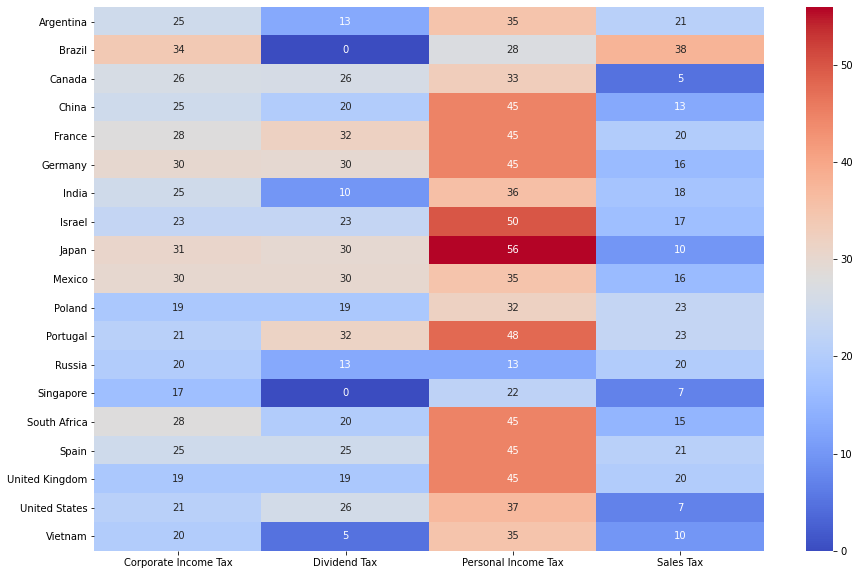

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(final_tax_system.drop('Country', axis=1), cmap='coolwarm', annot=True, yticklabels=final_tax_system['Country'])

In [39]:
#Jupyter setup: to show the graphs on Jupyter.
init_notebook_mode(connected=True)